[View in Colaboratory](https://colab.research.google.com/github/princekiran/EliteExports/blob/master/practice_pandas.ipynb)

In [2]:
#Importing padas as pd

import pandas as pd

from pprint import pprint as pp
pd.__version__

'0.22.0'

In [4]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
# code - 4/WwAVgexNBd7pTcywzuVgYfAIlo2TijHH8XyhFHGHOOx5Cu1_BP2ItHY
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '1zE3y2k4Ireg3T4jeedSB-s7-0xKxZ9kI'
downloaded = drive.CreateFile({'id': file_id})

downloaded.GetContentFile('ign.csv')

!ls -lha ign.csv



-rw-r--r-- 1 root root 2.0M Sep 15 07:05 ign.csv


In [0]:
# Now, we can use pandas read_excel after installing the excel importer.
!pip install -q xlrd

import pandas as pd

reviews = pd.read_csv('ign.csv')

print(reviews)

In [0]:
#Head will return top rows and tail will return last rows default is 5

pp(reviews.head(7))

#pp(reviews.tail())

In [33]:
#We can view shapes

reviews.shape

(18625, 11)

In [0]:
#Below code replicate head()

reviews.iloc[0:5,:]

In [0]:
#Removing first column because of no use

reviews = reviews.iloc[:,1:]
reviews.head()

In [20]:
reviews.loc[0:5,:]

reviews.index

RangeIndex(start=0, stop=18625, step=1)

In [0]:
# Just take some reviews 

some_reviews = reviews.iloc[10:20]
some_reviews.head()

In [25]:
#Specify column name in loc

reviews.loc[:5, ["title",'url']]

,title,url
0,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907
1,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...
2,Splice: Tree of Life,/games/splice/ipad-141070
3,NHL 13,/games/nhl-13/xbox-360-128182
4,NHL 13,/games/nhl-13/ps3-128181
5,Total War Battles: Shogun,/games/total-war-battles-shogun/mac-142565


In [0]:
#Retrive second column (three are same)

reviews.iloc[:,1]
reviews.loc[:,'score_phrase']
reviews['score']

In [0]:
#list of columns

reviews[['score','release_year']]

In [32]:
#verify object type

type(reviews)
type(reviews['score'])

pandas.core.series.Series

In [44]:
#creating pandas series

s1 = pd.Series([4,4])
s1

s2 = pd.Series(['Hello','kiran'])
s2

0    Hello
1    kiran
dtype: object

In [46]:
#creating dataframe

pd.DataFrame([s1,s2])

,0,1
0,4,4
1,Hello,kiran


In [48]:
pd.DataFrame(
    [
        [1,2],
        ["Boris Yeltsin", "Mikhail Gorbachev"]
    ],
    index=["row1", "row2"],
    columns=["column1", "column2"]
)

,column1,column2
row1,1,2
row2,Boris Yeltsin,Mikhail Gorbachev


In [49]:
frame = pd.DataFrame({
    "col1":s1,
    "col2":s2
})

frame

,col1,col2
0,4,Hello
1,4,kiran


In [56]:
#Dataframe methods

reviews['title'].head()

reviews['score'].mean()

reviews.mean()

#by default mean axis is 0 which will compute mean of each column
#axis = 1 will compute each row

reviews.head().mean(axis=1)

0    510.500
1    510.500
2    510.375
3    510.125
4    510.125
dtype: float64

In [60]:
#Other mean methods

reviews.corr()

reviews.count()

reviews.max()

reviews.std()

score            1.711736
release_year     4.587529
release_month    3.476710
release_day      8.690128
dtype: float64

In [0]:
#Dataframe maths (*,+,-)

reviews['score']/3

In [0]:
# Boolean indexing

score_filter = reviews['score']>5

filtered_reviews = reviews[score_filter]

filtered_reviews


In [0]:
#multiple condition

xbox_one_filter = (reviews["score"] > 7) & (reviews["platform"] == "Xbox One")
filtered_reviews = reviews[xbox_one_filter]
filtered_reviews.head()

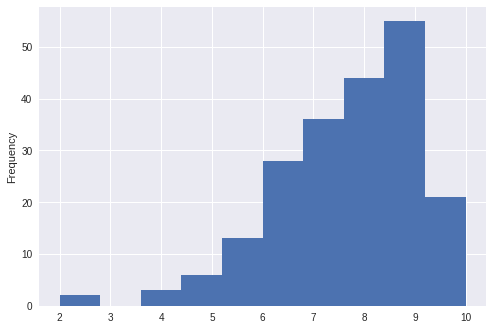

In [15]:
#plot for histoic diagram for xbox one

import matplotlib

reviews[reviews["platform"] == "Xbox One"]["score"].plot(kind="hist")

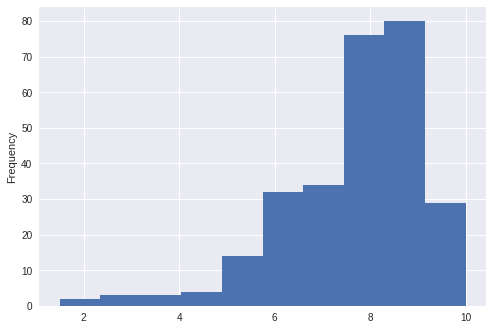

In [14]:
#for ps4

reviews[reviews['platform'] == 'PlayStation 4']['score'].plot(kind='hist')

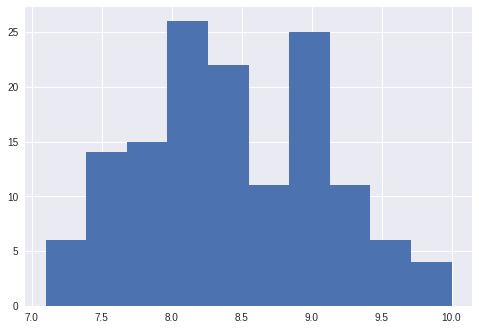

In [16]:
filtered_reviews['score'].hist()